<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/09_GenerazioneNumeriPseudocasuali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generazione di numeri (pseudo-)casuali

Nel presente notebook sono passate in rassegna e testate le principali tecniche di generazione di numeri pseudo-casuali.

## Generazione di numeri pseudo-casuali uniformi in $(0,1)$

Di seguito si implementa, all'interno di un metodo, il generatore congruenziale lineare. In questo generatore, a partire da un seme $y_0$ si genera dapprima una sequenza di interi $y_k$, ($k=1, \dots$) utilizzando la seguente formula ricorsiva:

$$y_{k+1} = (a y_k + c) \ \mathrm{mod} \ m$$

dove $m$, $a$ e $c$ sono dei parametri chiamati, rispettivamente modulo, moltiplicatore e incremento.

A partire dalla sequenza di interi $y_k$ si ottiene poi la sequenza di numeri $u_k$ ($k=1, \dots,$), interpretabili come realizzazioni di una variabile aleatoria $U(0,1)$, attraverso la relazione:

$$u_{k+1} = y_{k+1} / m.$$

In [ ]:
def LCG(N, a, c, m, y0):
  y = [y0]
  u = [y0/m]

  for i in range(1, N+1):
    y.append((a * y[i-1] + c) % m)
    u.append(y[i]/m)

  return u[1:]

u = LCG(5, 1, 5, 4, 2)
print(u)

[0.75, 0.0, 0.25, 0.5, 0.75]


Verifichiamo che il generatore congruenziale lineare mostri una distribuzione uniforme in $(0,1)$. Generiamo 10000 campioni e visualizziamo l'istogramma relativo.

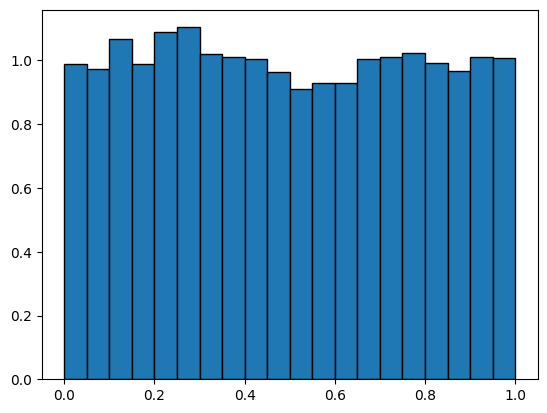

In [ ]:
import matplotlib.pyplot as plt

u = LCG(10000, 372, 551, 44443789, 79)

plt.hist(u, bins=20, histtype='bar', edgecolor='black', density=True)
plt.show()

Aumentiamo a 100000 il numero di campioni e verifichiamo che l'approssimazione migliora.

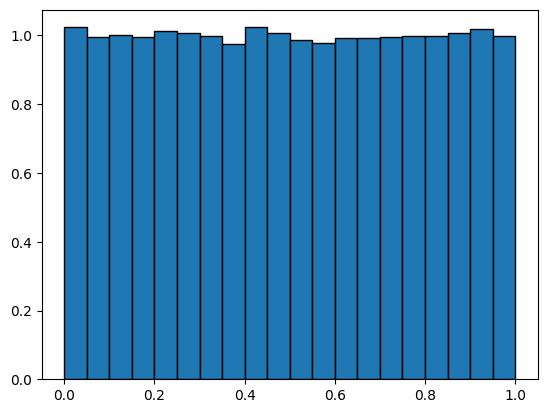

In [ ]:
u = LCG(100000, 372, 551, 44443789, 79)

plt.hist(u, bins=20, histtype='bar', edgecolor='black', density=True)
plt.show()

Aumentiamo a 1000000 il numero di campioni generati. L'approssimazione migliora ulteriormente.

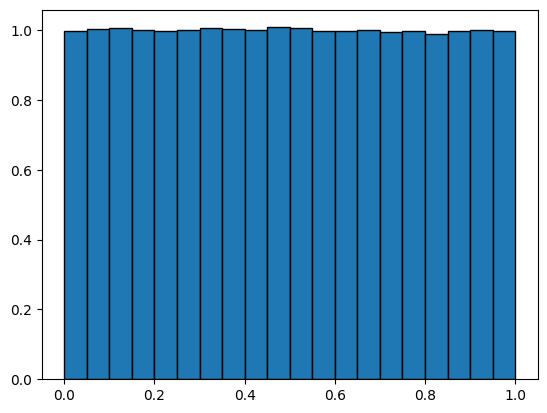

In [ ]:
u = LCG(1000000, 372, 551, 44443789, 79)

plt.hist(u, bins=20, histtype='bar', edgecolor='black', density=True)
plt.show()

Se $n \geq m$ la sequenza generata mostra la sua periodicità.

[0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0, 0.25, 0.5, 0.75, 0.0

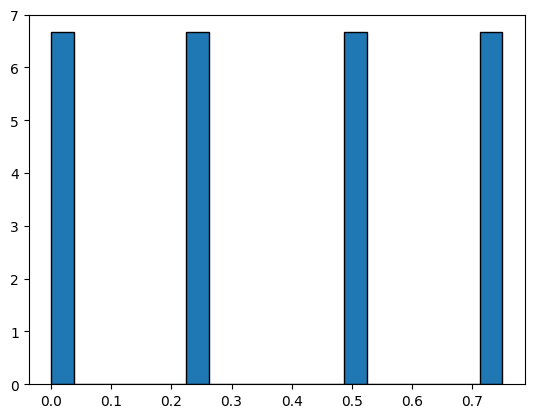

In [ ]:
u = LCG(10000, 1, 5, 4, 2)

print(u)

plt.hist(u, bins=20, histtype='bar', edgecolor='black', density=True)
plt.show()

È suffiente considerare $m > n$ per non avere sequenze periodiche? Con il seguente esempio si fa vedere che non è esattamente così. Il metodo implementato genera una sequenza di valori e, per ognuno di essi, verifica che lo stesso non sia già stato generato. In output restituisce una coppia di valori rappresentanti gli indici della prima e della seconda volta in cui lo stesso campione è generato.

In [ ]:
def LCG_cycle(N, a, c, m, y0):
  y = [y0]
  u = [y0/m]

  for i in range(1, N+1):
    y.append((a * y[i-1] + c) % m)
    u.append(y[i]/m)
    for j in range(0, i):
      if y[i] == y[j]:
        return (j,i)

  return (0,0)

print(LCG_cycle(50000, 1, 5, 4444, 2))
print(LCG_cycle(100000, 372, 551, 39872, 78))

(0, 4444)
(3, 80)


Nel codice di seguito riportato si utilizza la libreria `random` di Python per ottenere numeri pseudo-casuali uniformi in $(0,1)$. La libreria utilizza l'algoritmo Mersenne Twister come generatore di base.

In [ ]:
import random as rnd

print("Numero random tra 0 e 1:", rnd.random())
print("Altro numero random tra 0 e 1:", rnd.random())
print("Ulteriore numero random tra 0 e 1:", rnd.random())

Numero random tra 0 e 1: 0.2483804820624217
Altro numero random tra 0 e 1: 0.7504265962577922
Ulteriore numero random tra 0 e 1: 0.30963000312481015


Per rendere riproducibile la sequenza generata è possibile memorizzare lo stato interno del generatore e poi ripristinarlo in un secondo momento.

In [ ]:
# Si memorizza lo stato del generatore
stato = rnd.getstate()
print("Lo stato del generatore Marsenne Twister è:", stato)
print("Nel generatore Marsenne Twister lo stato è un vettore e non un singolo scalare\n")

# Si generano i numeri pseudo-casuali desiderati
print("Tre numeri random tra 0 e 1:", rnd.random(), rnd.random(), rnd.random(), "\n")

# Si ripristina lo stato del generatore
print("Ripristino lo stato del generatore\n")
rnd.setstate(stato)

# Si estraggono gli STESSI numeri pseudo-casuali di prima
print("Estrazione degli stessi tre numeri random tra 0 e 1:", rnd.random(), rnd.random(), rnd.random())

Lo stato del generatore Marsenne Twister è: (3, (3657880395, 378208865, 2945085655, 1974265781, 858098330, 789574424, 133933038, 809976596, 463697040, 1554625348, 2664465788, 728468266, 2756708661, 1735564978, 1943629745, 3986439974, 498023220, 1383040556, 4099163058, 2234356351, 273706546, 1906320765, 719816882, 1493342461, 1311923218, 4258343591, 2407185980, 2929433671, 4145615714, 681871732, 1060845924, 2498520105, 2589680460, 483522862, 2467872726, 2711293900, 3366293459, 2297925206, 2597790943, 661525721, 2442366705, 744429562, 873586313, 2121802109, 2418473909, 1169389413, 2995676554, 3654404525, 3027652532, 3389780590, 1111529952, 1802096398, 1428075716, 3302665481, 3524164365, 246007458, 4202457870, 2074395704, 1358134692, 4175439665, 3444476560, 1837966327, 3723530459, 869736187, 1105570616, 3777353373, 1466411086, 858446149, 3400254736, 3041585834, 3916004039, 3421091563, 2713081374, 2582106805, 3447579697, 2352251284, 1405830335, 2222030028, 406774983, 2375934311, 2429465541

Un'alternativa è utilizzare il metodo `seed()` per specificare esplicitamente un valore seme da utilizzare per inizializzare il generatore.

In [ ]:
import random as rnd

rnd.seed(10)
print(rnd.random())
print(rnd.random())
print(rnd.random(), "\n")

rnd.seed(10)
print(rnd.random())
print(rnd.random())
print(rnd.random())

0.5714025946899135
0.4288890546751146
0.5780913011344704 

0.5714025946899135
0.4288890546751146
0.5780913011344704


## Generazione di numeri pseudo-casuali con distribuzione continua generica

Di seguito si implementa il metodo della trasformazione inversa per ottenenere, a partire da una sequenza $u_k$ ($k=1,2,\dots$) di numeri interpretabili come appartenenti ad una distribuzione $U(0,1)$, una sequenza $x_k$ ($k=1,2,\dots$) di numeri interpretabili come appartenenti ad una distribuzione con CDF $F_X(\cdot)$. La trasformazione è: $X = F_{X}^{-1}(U)$.

In primo luogo, il metodo è utilizzato per ottenere numeri interpretabili come appartenenti ad una distribuzione esponenziale con parametro $\lambda$. Nell'esempio, $\lambda=10$.

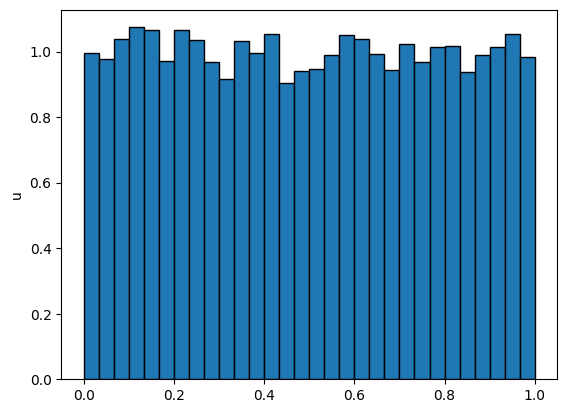

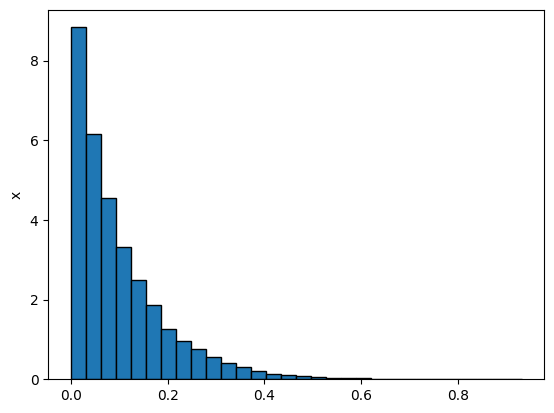

In [ ]:
from random import *
import matplotlib.pyplot as plt
from math import *

n = 10000
u = []
for i in range(0, n):
  u.append(random())

plt.hist(u, density=True, edgecolor='black', bins=30)
plt.ylabel('u')
plt.show()

lmd = 10
x=[]
for i in range(0, n):
  x.append(-1/lmd * log(1-u[i]))

plt.hist(x, density=True, edgecolor='black', bins=30)
plt.ylabel('x')
plt.show()

Di seguito, il metodo è utilizzato per ottenere numeri interpretabili come appartenenti ad una distribuzione uniforme $U(a,b)$. Nell'esempio, $a=3$ e $b=7$.

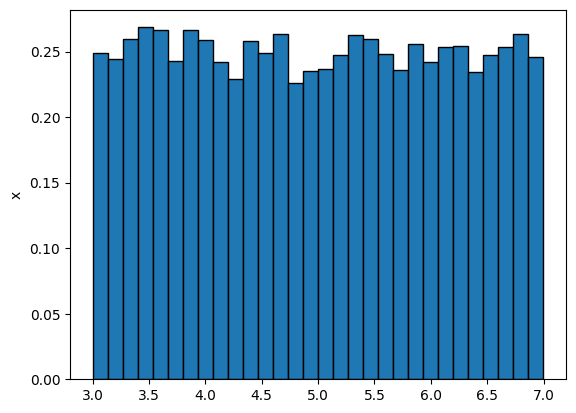

In [ ]:
a=3
b=7
x=[]
for i in range(0,n):
    x.append(a+(b-a)*u[i])
plt.hist(x, density=True, edgecolor='black', bins=30)
plt.ylabel('x')
plt.show()

Di seguito si utilizzano i metodi della libreria `random` per generare sequenze di numeri interpretabili come appartenenti ad una distribuzione esponenziale con parametro $\lambda=10$ e ad una distribuzione $U(3,7)$. I metodi sono, rispettivamente, `random.expovariate()` e `random.uniform()`.

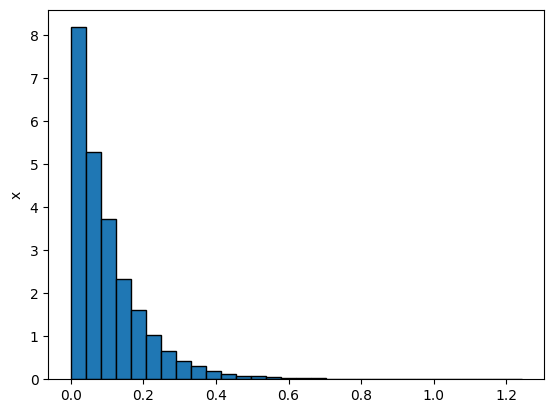

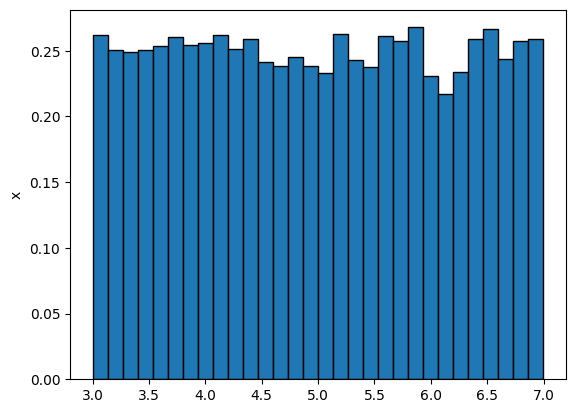

In [ ]:
n = 10000

# Distribuzione esponenziale con parametro lambda = 10
lmd = 10
x=[]
for i in range(0, n):
  x.append(rnd.expovariate(lmd))
plt.hist(x, density=True, edgecolor='black', bins=30)
plt.ylabel('x')
plt.show()

n = 10000

# Distribuzione uniforme in [3, 7]
a=3
b=7
x=[]
for i in range(0, n):
  x.append(rnd.uniform(a, b))
plt.hist(x, density=True, edgecolor='black', bins=30)
plt.ylabel('x')
plt.show()

Gli stessi risultati sono ottenibili con il modulo `numpy.random`. Per la distribuzione esponenziale il metodo è `exponential()`.

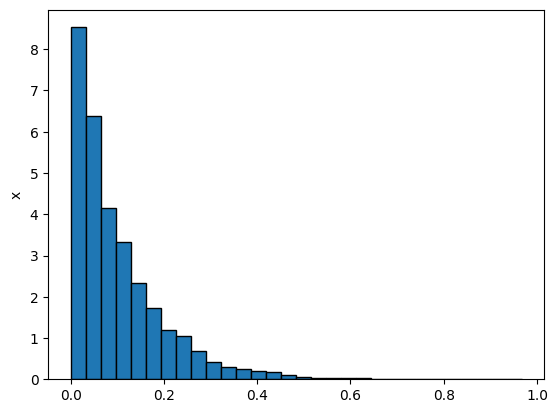

In [ ]:
import numpy.random as r

n = 10000

# Distribuzione esponenziale con parametro lambda = 10
lmd = 10
x = r.exponential(1/lmd, n)
plt.hist(x, density=True, edgecolor='black', bins=30)
plt.ylabel('x')
plt.show()

Per la distribuzione uniforme, invece, il metodo è `uniform()`.

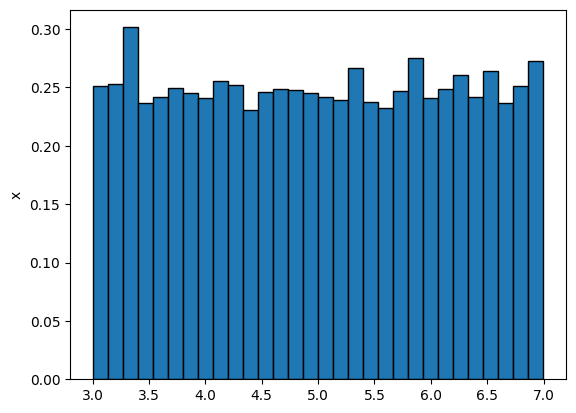

In [ ]:
import numpy.random as r

n = 10000

# Distribuzione uniforme in [3, 7]
a = 3
b = 7
x = r.uniform(a, b, n)
plt.hist(x, density=True, edgecolor='black', bins=30)
plt.ylabel('x')
plt.show()

## Generazione di numeri pseudo-casuali con distribuzione discreta generica

Data $P(X=a_i)=p_i$ ($i=1,\dots,n$) funzione di massa di probabilità della variabile aleatoria discreta per la quale si vogliono generare dei numeri pseudo-casuali, la trasformazione avviene, a partire da numeri generati secondo una distribuzione $U(0,1)$, utilizzando la formula:

$$
X = \begin{cases}
a_1 & \text{se } u \leq p_1 \\
a_2 & \text{se } p_1 < u \leq p_1 + p_2 \\
\vdots & \vdots \\
a_n & \text{se } p_1 + \cdots + p_{n-1} < u \leq 1
\end{cases}
$$

Di seguito l'implementazione di tale meccanismo.

In [ ]:
import random as rnd

def campionamento_va_discreta(p):
  u = rnd.random()
  print("Numero U(0,1):", u)
  cp = 0 # probabilità cumulata
  for valore in p.keys():
    if u < cp + p[valore]:
      return valore
    else:
      cp += p[valore]

# funzione massa di probabilità
p = {'A': 0.1, 'B': 0.3, 'C': 0.5, 'D': 0.1}
l = ['A', 'B', 'C', 'D']
campione = campionamento_va_discreta(p)
print('Valore pseudo-casuale estratto dalla lista', l,
      '\nsecondo la distribuzione di probabilità', p, '\nè:', campione)

Numero U(0,1): 0.5040842481609642
Valore pseudo-casuale estratto dalla lista ['A', 'B', 'C', 'D'] 
secondo la distribuzione di probabilità {'A': 0.1, 'B': 0.3, 'C': 0.5, 'D': 0.1} 
è: C


In alternativa, si possono utilizzare le funzionalità della libreria `random`.

In [1]:
import random as rnd

# Generazione di un numero intero tra 0 e 7
print('Valore intero distribuito uniformemente tra 0 e 7:', rnd.randrange(8), '\n')

# Generazione di un elemento da una lista di elementi equiprobabili
l = ['A', 'B', 'C', 'D']
print('Valore pseudo-casuale estratto dalla lista', l, ':', rnd.choice(l), '\n')

# Generazione di un elemento da una lista di elementi aventi probabilità diverse
p = [0.1, 0.3, 0.5, 0.1]
print('Valore pseudo-casuale estratto dalla lista', l, 'con probabilità', p, ':', rnd.choices(l, p), '\n')

# Generazione di più elementi da una lista di elementi aventi probabilità diverse
print('Tre valori pseudo-casuali estratti dalla lista', l, 'con probabilità', p, ':', rnd.choices(l, p, k=3))

Valore intero distribuito uniformemente tra 0 e 7: 1 

Valore pseudo-casuale estratto dalla lista ['A', 'B', 'C', 'D'] : A 

Valore pseudo-casuale estratto dalla lista ['A', 'B', 'C', 'D'] con probabilità [0.1, 0.3, 0.5, 0.1] : ['C'] 

Tre valori pseudo-casuali estratti dalla lista ['A', 'B', 'C', 'D'] con probabilità [0.1, 0.3, 0.5, 0.1] : ['C', 'C', 'C']
